### 数据加载

In [ ]:
import csv
import jieba

ds_comments = []

# 数据地址: https://www.kaggle.com/datasets/utmhikari/doubanmovieshortcomments，数据下载到当前目录下的 data/comments.csv
with open('data/comments.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        vote = int(row['Star'])
        if vote in [1, 2, 4, 5]:
            words = jieba.lcut(row['Comment'])
            ds_comments.append((words, 1 if vote in [1, 2] else 0))

len(ds_comments)


1650497

#### 分析评论长度，考虑截取过长，过短评论

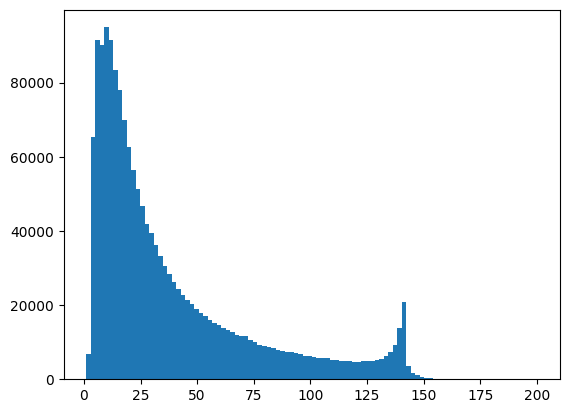

In [20]:
import matplotlib.pyplot as plt

comments_len = [len(''.join(c)) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

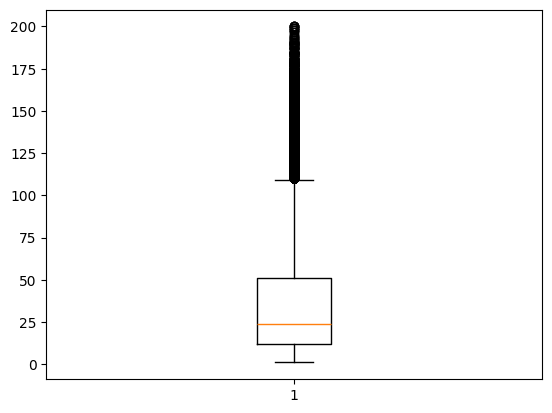

In [21]:
plt.boxplot(comments_len)
plt.show

In [22]:
# 评论词汇长度在10～110之间
ds_comments = [c for c in ds_comments if len(''.join(c[0])) in range(10, 110)]

In [23]:
len(ds_comments)

1226185

In [24]:
ds_comments[0]

([' ', '虽然', '从头', '打到', '尾', '，', '但是', '真的', '很', '无聊', '啊', '。'], 1)

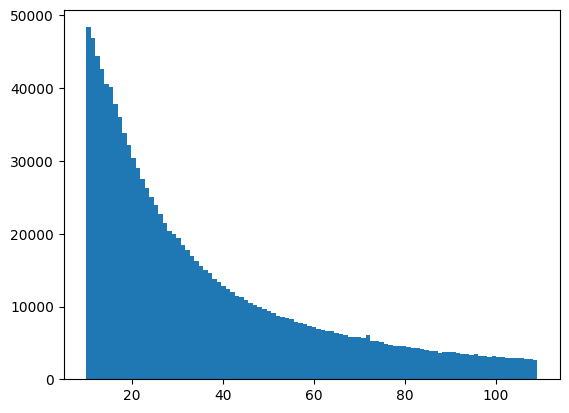

In [25]:
comments_len = [len(''.join(c)) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

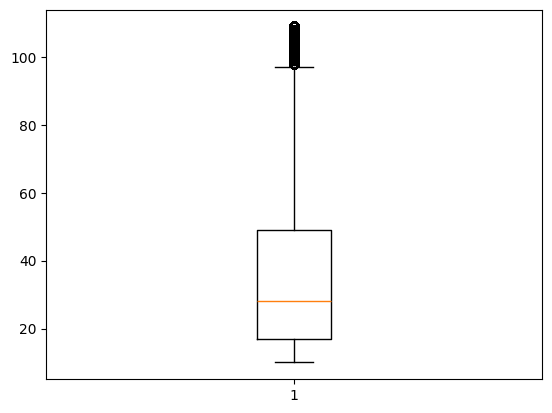

In [26]:
plt.boxplot(comments_len)
plt.show

In [27]:
len(ds_comments)

1226185

In [28]:
# 数据量过大，取前10w条
ds_comments = ds_comments[:100000]

In [29]:
import pickle

with open('data/comments.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)